# Machine Learning Nanodegree Capstone
# Chat Room Recommendation Data Visualizations

In [1]:
import os

In [2]:
# path will need to be changed pending on where the repo is cloned to
os.chdir(os.path.expanduser('~/PycharmProjects/chat-room-recommendation/'))
lines = open('cornell-movie-dialogs-corpus/movie_lines.txt','r').read().split('\n')
movie_metadata = open('cornell-movie-dialogs-corpus/movie_titles_metadata.txt','r').read().split('\n')

In [3]:
from gensim import utils
movieLines = {}
for line in lines:
    _line = line.split(' +++$+++ ')
    if len(_line) == 5:
        if _line[2] in movieLines: 
            movieLines[_line[2]] = movieLines.get(_line[2]) + utils.simple_preprocess(_line[4])
        else:
            movieLines[_line[2]] = utils.simple_preprocess(_line[4])

Using TensorFlow backend.


In [4]:
# function that creates corpus (list of TaggedDocmuments) from dictionaries
from gensim.models.doc2vec import TaggedDocument


def create_corpus(dictname):
    corpus_list =[]
    for key, value in dictname.iteritems():
        corpus_list.append(TaggedDocument(value, [int(key[1:])]))
    return corpus_list

In [5]:
train_corpus = create_corpus(movieLines)

In [6]:
train_corpus[0].tags

[511]

In [7]:
# import pandas as pd
# from StringIO import StringIO
# 
# data = StringIO(train_corpus)
# ds = pd.read_csv(data)

In [8]:
# load model if saved during a previous session
from gensim.models import Doc2Vec

model = Doc2Vec.load('/tmp/movie_model.doc2vec')

In [9]:
model.save_word2vec_format('/tmp/doc_tensor.w2v', doctag_vec=True, word_vec=False)

In [10]:
%run word2vec2tensor.py -i /tmp/doc_tensor.w2v -o cornell-movie

2017-09-21 22:20:48,531 : MainThread : INFO : running word2vec2tensor.py -i /tmp/doc_tensor.w2v -o cornell-movie


2017-09-21 22:20:48,555 : MainThread : INFO : loading projection weights from /tmp/doc_tensor.w2v


2017-09-21 22:20:48,763 : MainThread : INFO : loaded (617, 50) matrix from /tmp/doc_tensor.w2v


2017-09-21 22:20:48,938 : MainThread : INFO : 2D tensor file saved to cornell-movie_tensor.tsv


2017-09-21 22:20:48,941 : MainThread : INFO : Tensor metadata file saved to cornell-movie_metadata.tsv


2017-09-21 22:20:48,946 : MainThread : INFO : finished running word2vec2tensor.py


In [11]:
titles = []
comedy = []
romance = []
adventure = []
biography = []
drama = []
history = []
action = []
crime = []
thriller = []
mystery = []
scifi = []
fantasy = []
western = []
music = []
war = []
family = []
sport = []
documentary = []
short = []


def get_movie_meta(id):
    for movie in movie_metadata:
        _movie = movie.split(' +++$+++ ')
        if len(_movie) == 6:

            if _movie[0] == 'm'+str(id):
                titles.append(_movie[1])
                _genres = _movie[5].replace("'", "").replace(" ", "").strip("[]").split(",")
                 
                is_comedy = "+" if 'comedy' in _genres else "-"
                comedy.append(is_comedy)
                
                is_romance = "+" if 'romance' in _genres else "-"
                romance.append(is_romance)
                
                is_adventure = "+" if 'adventure' in _genres else "-"
                adventure.append(is_adventure)
                    
                is_biography = "+" if 'biography' in _genres else "-"
                biography.append(is_biography)    
                
                is_drama = "+" if 'drama' in _genres else "-"
                drama.append(is_drama)                   

                is_history = "+" if 'history' in _genres else "-"
                history.append(is_history)  
                
                is_action = "+" if 'action' in _genres else "-"
                action.append(is_action)       
 
                is_crime = "+" if 'crime' in _genres else "-"
                crime.append(is_crime)                   
                
                is_thriller = "+" if 'thriller' in _genres else "-"
                thriller.append(is_thriller)      
                
                is_mystery = "+" if 'mystery' in _genres else "-"
                mystery.append(is_mystery)   
                
                is_scifi = "+" if 'sci-fi' in _genres else "-"
                scifi.append(is_scifi)      
                
                is_fantasy = "+" if 'fantasy' in _genres else "-"
                fantasy.append(is_fantasy)    
                
                is_western = "+" if 'western' in _genres else "-"
                western.append(is_western) 
                
                is_music = "+" if 'music' in _genres else "-"
                music.append(is_music)      
                
                is_war = "+" if 'war' in _genres else "-"
                war.append(is_war)    
                
                is_family = "+" if 'family' in _genres else "-"
                family.append(is_family)            
                
                is_sport = "+" if 'sport' in _genres else "-"
                sport.append(is_sport)   
                
                is_documentary = "+" if 'documentary' in _genres else "-"
                documentary.append(is_documentary) 
                
                is_short = "+" if 'short' in _genres else "-"
                short.append(is_short)

In [12]:
train_corpus[0].tags
for movie in train_corpus:
    get_movie_meta(movie.tags[0])

In [15]:
# check to see if metadata was created correctly
print train_corpus[0].tags[0]
print train_corpus[1].tags[0]
print titles[:2]
print comedy[:2]
print romance[:2]
print drama[:2]
print len(drama)

511
510
['shakespeare in love', 'seven days to live']
['+', '-']
['+', '-']
['+', '+']
617


In [16]:
with open('cornell-movie_metadata.tsv','w') as w:
    w.write('Titles\tComedy\tRomance\tAdventure\tBiography\tDrama\tHistory\tAction\tCrime\tThriller\tMystery\tScifi'
            +'\tFantasy\tWestern\tMusic\tWar\tFamily\tSport\tDocumentary\tShort\n')
    for f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,x,y,z in zip(titles, comedy, romance, adventure, 
                   biography, drama, history, action,
                   crime, thriller, mystery, scifi, 
                   fantasy, western, music, war, family, 
                   sport, documentary, short):
        w.write("%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\n" % (f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,x,y,z))

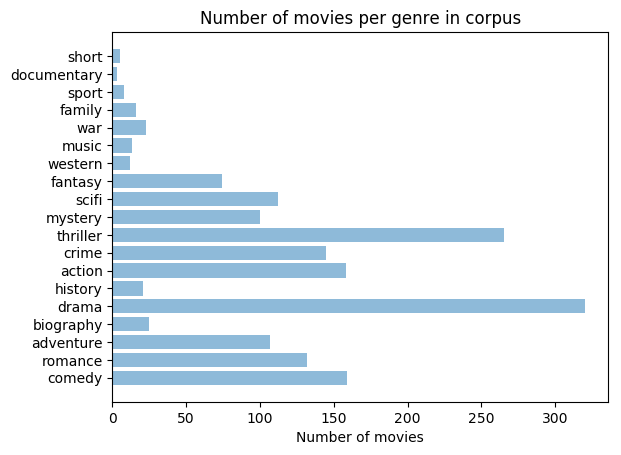

In [17]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('comedy', 'romance', 'adventure', 'biography', 'drama', 'history',
           'action', 'crime', 'thriller', 'mystery', 'scifi', 'fantasy', 'western',
           'music', 'war', 'family', 'sport', 'documentary', 'short')

y_pos = np.arange(len(objects))

genre_count = [sum(g == "+" for g in comedy), sum(g == "+" for g in romance), 
               sum(g == "+" for g in adventure), sum(g == "+" for g in biography),
               sum(g == "+" for g in drama), sum(g == "+" for g in history),
               sum(g == "+" for g in action), sum(g == "+" for g in crime),
               sum(g == "+" for g in thriller), sum(g == "+" for g in mystery),
               sum(g == "+" for g in scifi), sum(g == "+" for g in fantasy),
               sum(g == "+" for g in western), sum(g == "+" for g in music),
               sum(g == "+" for g in war), sum(g == "+" for g in family),
               sum(g == "+" for g in sport), sum(g == "+" for g in documentary),
               sum(g == "+" for g in short)]

plt.barh(y_pos, genre_count, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel("Number of movies")
plt.title('Number of movies per genre in corpus')

plt.show()